# Introduction

**Dataset Overview:**

Full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT.

The data include: Date, Open, High, Low, Close, Volume, OpenInt.

**Selected Dataset:**

googl.us.txt

nvda.us.txt

aapl.us.txt

msft.us.txt

https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data

# Import Libriaries

In [339]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, ClassifierMixin

import warnings
warnings.filterwarnings('ignore')

# Load data

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
# Define path
data_dir = '/content/drive/MyDrive/HULT/Summer 2024 2/AI in Finance/A1'

# Load the data files into DataFrames
googl = pd.read_csv(os.path.join(data_dir, 'googl.us.txt'), delimiter=',')
nvda = pd.read_csv(os.path.join(data_dir, 'nvda.us.txt'), delimiter=',')
aapl = pd.read_csv(os.path.join(data_dir, 'aapl.us.txt'), delimiter=',')
msft = pd.read_csv(os.path.join(data_dir, 'msft.us.txt'), delimiter=',')

# Drop 'OpenInt' column
googl.drop('OpenInt', axis=1, inplace=True)
nvda.drop('OpenInt', axis=1, inplace=True)
aapl.drop('OpenInt', axis=1, inplace=True)
msft.drop('OpenInt', axis=1, inplace=True)

# Convert 'Date' column to datetime objects
googl['Date'] = pd.to_datetime(googl['Date'])
nvda['Date'] = pd.to_datetime(nvda['Date'])
aapl['Date'] = pd.to_datetime(aapl['Date'])
msft['Date'] = pd.to_datetime(msft['Date'])

# Set 'Date' as index
googl.set_index('Date', inplace=True)
nvda.set_index('Date', inplace=True)
aapl.set_index('Date', inplace=True)
msft.set_index('Date', inplace=True)

# Display the first few rows
print("First few rows:\n")
print("GOOGL:\n", googl.head())
print("NVDA:\n", nvda.head())
print("AAPL:\n", aapl.head())
print("MSFT:\n", msft.head())

First few rows:

GOOGL:
               Open   High     Low   Close    Volume
Date                                               
2004-08-19  50.000  52.03  47.980  50.170  44703800
2004-08-20  50.505  54.54  50.250  54.155  22857200
2004-08-23  55.375  56.74  54.525  54.700  18274400
2004-08-24  55.620  55.80  51.785  52.435  15262600
2004-08-25  52.480  54.00  51.940  53.000   9197800
NVDA:
               Open    High     Low   Close  Volume
Date                                              
2005-02-25  18.369  19.057  18.320  18.590  236278
2005-02-28  18.590  18.893  18.392  18.434  126360
2005-03-01  18.549  18.753  17.674  18.222  282400
2005-03-02  18.262  18.392  17.421  17.715  304900
2005-03-03  17.664  18.042  17.429  17.617  172769
AAPL:
                Open     High      Low    Close    Volume
Date                                                    
1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030
1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532
1984-09-11  

# Descriptive Statistics

In [342]:
# Calculate the date range for each stock
date_ranges = {
    'GOOGL': (googl.index.min(), googl.index.max()),
    'NVDA': (nvda.index.min(), nvda.index.max()),
    'AAPL': (aapl.index.min(), aapl.index.max()),
    'MSFT': (msft.index.min(), msft.index.max())
}

# Display the date ranges
for stock, (start, end) in date_ranges.items():
    print(f"{stock}: {start} to {end}")

GOOGL: 2004-08-19 00:00:00 to 2017-11-10 00:00:00
NVDA: 2005-02-25 00:00:00 to 2017-11-10 00:00:00
AAPL: 1984-09-07 00:00:00 to 2017-11-10 00:00:00
MSFT: 1986-03-13 00:00:00 to 2017-11-10 00:00:00


In [343]:
# Descriptive statistics
print("GOOGL Descriptive Statistics:\n", googl.describe())
print("\nNVDA Descriptive Statistics:\n", nvda.describe())
print("\nAAPL Descriptive Statistics:\n", aapl.describe())
print("\nMSFT Descriptive Statistics:\n", msft.describe())

GOOGL Descriptive Statistics:
               Open         High          Low        Close        Volume
count  3333.000000  3333.000000  3333.000000  3333.000000  3.333000e+03
mean    389.993375   393.377354   386.213266   389.855821  7.951734e+06
std     235.104757   236.348229   233.616339   235.102374  8.327410e+06
min      49.595000    50.870000    47.980000    50.005000  0.000000e+00
25%     228.730000   230.930000   226.170000   228.510000  2.535424e+06
50%     295.980000   298.190000   293.350000   295.610000  5.201600e+06
75%     550.370000   554.780000   545.500000   549.490000  1.047400e+07
max    1050.050000  1063.620000  1047.050000  1058.290000  8.223340e+07

NVDA Descriptive Statistics:
               Open         High          Low        Close        Volume
count  3201.000000  3201.000000  3201.000000  3201.000000  3.201000e+03
mean     39.856002    40.474187    39.232155    39.848194  9.359765e+04
std      16.934893    17.042917    16.828660    16.960085  2.404855e+05
mi

In [344]:
# Dimension
print("GOOGL Shape:", googl.shape)
print("NVDA Shape:", nvda.shape)
print("AAPL Shape:", aapl.shape)
print("MSFT Shape:", msft.shape)

GOOGL Shape: (3333, 5)
NVDA Shape: (3201, 5)
AAPL Shape: (8364, 5)
MSFT Shape: (7983, 5)


In [345]:
# Check datatype and info
print("GOOGL Info:\n", googl.info())
print("NVDA Info:\n", nvda.info())
print("AAPL Info:\n", aapl.info())
print("MSFT Info:\n", msft.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2004-08-19 to 2017-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3333 non-null   float64
 1   High    3333 non-null   float64
 2   Low     3333 non-null   float64
 3   Close   3333 non-null   float64
 4   Volume  3333 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 156.2 KB
GOOGL Info:
 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3201 entries, 2005-02-25 to 2017-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3201 non-null   float64
 1   High    3201 non-null   float64
 2   Low     3201 non-null   float64
 3   Close   3201 non-null   float64
 4   Volume  3201 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 150.0 KB
NVDA Info:
 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8364 entries, 1984-09-07 to 2017-11-10
Dat

In [346]:
# Data Cleaning and Preprocessing
# Check for missing values
print("GOOGL Missing Values:\n", googl.isnull().sum())
print("NVDA Missing Values:\n", nvda.isnull().sum())
print("AAPL Missing Values:\n", aapl.isnull().sum())
print("MSFT Missing Values:\n", msft.isnull().sum())

GOOGL Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
NVDA Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
AAPL Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
MSFT Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Data Visulization

## Line plots Stock prices

In [347]:
# Define a function to create candlestick charts
def create_candlestick(df, title):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                         open=df['Open'],
                                         high=df['High'],
                                         low=df['Low'],
                                         close=df['Close'])])
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Price')
    return fig

# Create candlestick charts for each stock
fig_googl = create_candlestick(googl, 'GOOGL Candlestick Chart')
fig_nvda = create_candlestick(nvda, 'NVDA Candlestick Chart')
fig_aapl = create_candlestick(aapl, 'AAPL Candlestick Chart')
fig_msft = create_candlestick(msft, 'MSFT Candlestick Chart')

# Show the charts
fig_googl.show()
fig_nvda.show()
fig_aapl.show()
fig_msft.show()

## Combined df 2007-2016

In [348]:
# Define the date range (10 yrs data)
start_date = '2007-01-01'
end_date = '2016-12-31'

# Filter each DataFrame by the date range
googl_filtered = googl[(googl.index >= start_date) & (googl.index <= end_date)]
nvda_filtered = nvda[(nvda.index >= start_date) & (nvda.index <= end_date)]
aapl_filtered = aapl[(aapl.index >= start_date) & (aapl.index <= end_date)]
msft_filtered = msft[(msft.index >= start_date) & (msft.index <= end_date)]

# Combine the 'Close' prices into a single DataFrame
combined_df_Close = pd.DataFrame({
    'GOOGL_Close': googl_filtered['Close'],
    'NVDA_Close': nvda_filtered['Close'],
    'AAPL_Close': aapl_filtered['Close'],
    'MSFT_Close': msft_filtered['Close']
})

# Forward fill NaN values
combined_df_close = combined_df_Close.fillna(method='ffill')

# Check for null values
null_values = combined_df_close.isnull().sum()
print("Null values in each column after forward fill:")
print(null_values)

# Calculate the Total column
combined_df_close['Total'] = combined_df_close.sum(axis=1)

# Optional: Display the combined DataFrame
combined_df_close.head()

Null values in each column after forward fill:
GOOGL_Close    0
NVDA_Close     0
AAPL_Close     0
MSFT_Close     0
dtype: int64


GOOGL_Close  NVDA_Close  AAPL_Close  MSFT_Close    Total
Date                                                                
2007-01-03       233.80      24.770      10.731      25.041  294.342
2007-01-04       241.63      24.191      10.969      24.998  301.788
2007-01-05       243.60      23.504      10.893      24.856  302.853
2007-01-08       241.79      26.024      10.946      25.099  303.859
2007-01-09       242.75      24.737      11.854      25.123  304.464

In [367]:
# Plotting the combined 'Close' prices (2007 - 2016)
fig_combined_df_close = px.line(combined_df_close, x=combined_df_close.index, y=combined_df_close.columns,
                                      title='Stock Prices Over Time (2007-01-01 to 2016-12-31)',
                                      labels={'value': 'Stock Price', 'variable': 'Stock'})
fig_combined_df_close.show()

The combined data for the stocks of Google, Nvidia, Apple, and Microsoft from 2007 to 2016 reveals distinct trends and performance metrics. Google and Apple exhibit significant growth, dominating the graph with their higher stock prices, especially notable during the post-2009 economic recovery.

## Box plot of stock prices

In [350]:
# Box plot of stock prices
fig_box = px.box(combined_df_close.melt(var_name='Stock', value_name='Price'), x='Stock', y='Price',
                 title='Box Plot of Stock Prices (2007-2016)')
fig_box.show()

Box plots illustrate the variations in stock prices, with Google showing a wider range of prices and potential volatility. Meanwhile, Microsoft and Nvidia displayed more consistent pricing, indicating less volatility over the observed period.

## Histogram of Daily Returns

In [351]:
# Calculate daily returns
combined_df_return = combined_df_close.diff()

# Histogram of daily returns
fig_hist_return = px.histogram(combined_df_return.melt(var_name='Stock', value_name='Daily Return'), x='Daily Return', color='Stock',
                        nbins=50, title='Histogram of Daily Returns')
fig_hist_return.show()

 Most of the stocks show returns clustering around zero, indicating days with minimal price changes are the most common. However, there are instances of significant positive and negative returns, reflecting the volatile nature of the stock market.

## Moving Averages

In [368]:
def plot_moving_averages(df, stock_close, stock_name):
    df[f'{stock_name}_MA50'] = df[stock_close].rolling(window=50).mean()
    df[f'{stock_name}_MA200'] = df[stock_close].rolling(window=200).mean()
    fig = px.line(df, x=df.index, y=[stock_close, f'{stock_name}_MA50', f'{stock_name}_MA200'],
                  title=f'{stock_name} Stock Price with 50-day and 200-day Moving Averages')
    fig.show()

# Create a copy of combined_df_close for moving averages calculation
combined_df_MA = combined_df_close.copy()

# Plot moving averages for each stock
plot_moving_averages(combined_df_MA, 'GOOGL_Close', 'GOOGL')
plot_moving_averages(combined_df_MA, 'NVDA_Close', 'NVDA')
plot_moving_averages(combined_df_MA, 'AAPL_Close', 'AAPL')
plot_moving_averages(combined_df_MA, 'MSFT_Close', 'MSFT')

The moving averages (50-day and 200-day) for each stock underscore different momentum and trends. For instance, Nvidia shows a strong upward trend starting around 2013, aligning with industry developments and market success. Apple’s stock demonstrated stability with periodic spikes in growth.

## Percentage growth

In [369]:
# Calculate the percentage change
combined_df_GR = combined_df_close.pct_change()
# Plotting the Monthly Growth Rate
fig_gr = px.line(combined_df_GR, x=combined_df_GR.index, y=combined_df_GR.columns,
                  title='Growth Rate (MGR)',
                  labels={'value': 'Growth Rate', 'variable': 'Stock'})
fig_gr.show()

In [354]:
# Resample the data to monthly frequency and calculate the percentage change
combined_df_MGR = combined_df_close.resample('M').ffill().pct_change()
# Plotting the Monthly Growth Rate
fig_mgr = px.line(combined_df_MGR, x=combined_df_MGR.index, y=combined_df_MGR.columns,
                  title='Monthly Growth Rate (MGR)',
                  labels={'value': 'Monthly Growth Rate', 'variable': 'Stock'})
fig_mgr.show()

In [355]:
# Resample the data to monthly frequency and calculate the percentage change
combined_df_QGR = combined_df_close.resample('Q').ffill().pct_change()
# Plotting the Monthly Growth Rate
fig_qgr = px.line(combined_df_QGR, x=combined_df_QGR.index, y=combined_df_QGR.columns,
                  title='Quaterly Growth Rate (MGR)',
                  labels={'value': 'Quaterly Growth Rate', 'variable': 'Stock'})
fig_qgr.show()

In [356]:
# Resample the data to yearly frequency and calculate the percentage change
combined_df_YGR = combined_df_close.resample('A').ffill().pct_change()

# Plotting the Yearly Growth Rate
fig_ygr = px.line(combined_df_YGR, x=combined_df_YGR.index, y=combined_df_YGR.columns,
                  title='Yearly Growth Rate (YGR)',
                  labels={'value': 'Yearly Growth Rate', 'variable': 'Stock'})
fig_ygr.show()

Analysis of monthly and quarterly growth rates reflects the cyclic nature of stock performance, with evident peaks and troughs correlating with market and economic events. The yearly growth rates highlight periods of significant gains, particularly for Google in the early years and Microsoft stabilizing with steady growth towards the end of the period.

## Correlation

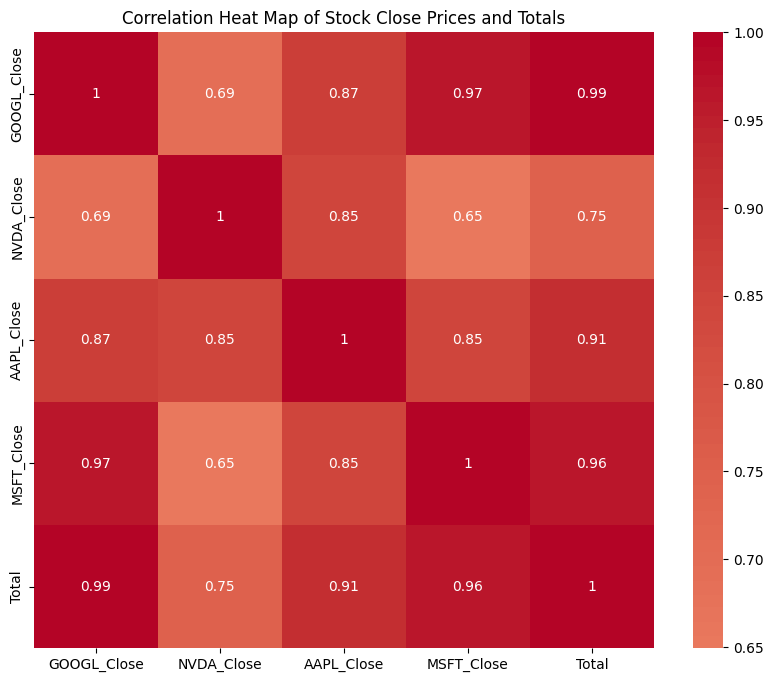

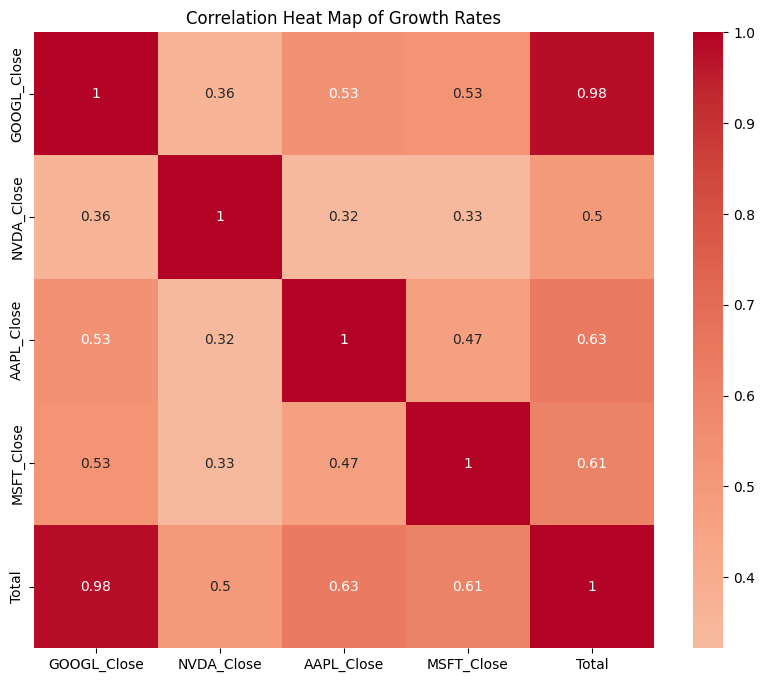

In [357]:
# Calculate correlation matrices
correlation_close_prices = combined_df_close.corr()
correlation_growth_rates = combined_df_GR.corr()

# Plot correlation heat maps
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_close_prices, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heat Map of Stock Close Prices and Totals')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_growth_rates, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heat Map of Growth Rates')
plt.show()

The correlation heatmaps provide a comprehensive look at the relationships between the stocks. High correlations between Google, Apple, and Microsoft suggest similar market influences and investor behaviors, whereas Nvidia shows slightly less correlation, indicating more independent stock movements based on company-specific factors.

# Machine Learning

## Create training and backtest df

In [358]:
# Create training and backtest df
# Drop the "Total" column
combined_df_close_ML = combined_df_close.drop(columns=['Total'])

# Define the date ranges for training and testing
start_date_train = '2007-01-01'
end_date_train = '2011-12-31'
start_date_backtest = '2012-01-01'
end_date_backtest = '2016-12-31'

# Filter the DataFrames by the date ranges
df_train = combined_df_close_ML[(combined_df_close_ML.index >= start_date_train) & (combined_df_close_ML.index <= end_date_train)].copy()
df_backtest = combined_df_close_ML[(combined_df_close_ML.index >= start_date_backtest) & (combined_df_close_ML.index <= end_date_backtest)].copy()

In [359]:
df_backtest.head()

GOOGL_Close  NVDA_Close  AAPL_Close  MSFT_Close
Date                                                       
2012-01-03       332.70      45.959      52.663      22.901
2012-01-04       334.14      44.995      52.946      23.448
2012-01-05       329.50      45.224      53.534      23.689
2012-01-06       325.01      45.175      54.094      24.049
2012-01-09       311.23      44.341      54.008      23.740

## Model Training

### Create Target and Feature columns

**Target:**  `buy`, `selL` or `hold` based on `Close Price`

**Features:**  `buy`, `selL` or `hold` based on different strategies: EMA, SMA, RSI, Bollinger Bands

In [360]:
# Function to calculate EMA crossover strategy signals
def ema_crossover_strategy(df, short_window=50, long_window=200):
    df['Short_EMA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    df['Long_EMA'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['EMA_Signal'] = np.where(df['Short_EMA'] > df['Long_EMA'], 1, np.where(df['Short_EMA'] < df['Long_EMA'], -1, 0))
    return df

# Function to calculate RSI
def rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['RSI_Signal'] = np.where(df['RSI'] > 70, -1, np.where(df['RSI'] < 30, 1, 0))
    return df

# Function to calculate SMA
def sma(df, short_window=50, long_window=200):
    df['Short_SMA'] = df['Close'].rolling(window=short_window).mean()
    df['Long_SMA'] = df['Close'].rolling(window=long_window).mean()
    df['SMA_Signal'] = np.where(df['Short_SMA'] > df['Long_SMA'], 1, np.where(df['Short_SMA'] < df['Long_SMA'], -1, 0))
    return df

# Function to calculate Bollinger Bands
def bollinger_bands(df, window=20, num_of_std=2):
    df['Rolling_Mean'] = df['Close'].rolling(window).mean()
    df['Bollinger_Upper'] = df['Rolling_Mean'] + (df['Close'].rolling(window).std() * num_of_std)
    df['Bollinger_Lower'] = df['Rolling_Mean'] - (df['Close'].rolling(window).std() * num_of_std)
    df['Bollinger_Signal'] = np.where(df['Close'] > df['Bollinger_Upper'], -1, np.where(df['Close'] < df['Bollinger_Lower'], 1, 0))
    return df

# Apply the strategy to each stock in the training df
stocks = ['GOOGL', 'NVDA', 'AAPL', 'MSFT']
train_strategies = {}

for stock in stocks:
    stock_data = df_train[[f'{stock}_Close']].copy()
    stock_data.rename(columns={f'{stock}_Close': 'Close'}, inplace=True)

    stock_data = ema_crossover_strategy(stock_data)
    stock_data = rsi(stock_data)
    stock_data = sma(stock_data)
    stock_data = bollinger_bands(stock_data)

    # Create Target
    stock_data['Target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1,
                                    np.where(stock_data['Close'].shift(-1) < stock_data['Close'], -1, 0))
    # Remove NaN values
    train_strategies[stock] = stock_data.dropna()

# Example output for one stock
train_strategies

{'GOOGL':              Close   Short_EMA    Long_EMA  EMA_Signal        RSI  RSI_Signal  \
 Date                                                                            
 2007-10-17  316.74  281.131038  257.120058           1  76.029667          -1   
 2007-10-18  319.81  282.647860  257.743839           1  77.265189          -1   
 2007-10-19  322.36  284.205199  258.386786           1  75.379592          -1   
 2007-10-22  325.38  285.819897  259.053385           1  76.191980          -1   
 2007-10-23  337.88  287.861469  259.837729           1  80.317250          -1   
 ...            ...         ...         ...         ...        ...         ...   
 2011-12-23  316.57  300.207655  284.653844           1  55.935423           0   
 2011-12-27  320.12  300.988531  285.006741           1  62.046784           0   
 2011-12-28  319.85  301.728197  285.353440           1  61.883931           0   
 2011-12-29  321.20  302.491797  285.710122           1  70.619524          -1   
 2011-1

In [361]:
df_train_googl = train_strategies['GOOGL']
df_train_nvda = train_strategies['NVDA']
df_train_aapl = train_strategies['AAPL']
df_train_msft = train_strategies['MSFT']

### Training for each stock

In [362]:
# Function to prepare the data for training
def prepare_data(df):
    features = ['Short_EMA',
                'Long_EMA',
                #'EMA_Signal',
                'RSI',
                #'RSI_Signal',
                'Short_SMA',
                'Long_SMA',
                #'SMA_Signal',
                'Rolling_Mean',
                'Bollinger_Upper',
                'Bollinger_Lower',
                #'Bollinger_Signal' # Signals has very low feature importance
                ]
    X = df[features]
    y = df['Target']
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForestClassifier for each DataFrame and store the model
def train_model(df, stock_name):
    X_train, X_test, y_train, y_test = prepare_data(df)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    feature_importances = model.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

    # Print results
    print(f"\nAccuracy for {stock_name}: {accuracy}")
    print(f"\nClassification Report for {stock_name}:\n{classification_rep}")
    print(f"\nFeature Importance for {stock_name}:\n{importance_df}\n")

    return model

# Training models for each stock
model_googl = train_model(df_train_googl, 'GOOGL')
model_nvda = train_model(df_train_nvda, 'NVDA')
model_aapl = train_model(df_train_aapl, 'AAPL')
model_msft = train_model(df_train_msft, 'MSFT')

# Store models for backtesting later
models = {
    'GOOGL': model_googl,
    'NVDA': model_nvda,
    'AAPL': model_aapl,
    'MSFT': model_msft
}



Accuracy for GOOGL: 0.5078369905956113

Classification Report for GOOGL:
              precision    recall  f1-score   support

          -1       0.52      0.48      0.50       163
           0       0.00      0.00      0.00         0
           1       0.50      0.53      0.52       156

    accuracy                           0.51       319
   macro avg       0.34      0.34      0.34       319
weighted avg       0.51      0.51      0.51       319


Feature Importance for GOOGL:
           Feature  Importance
2              RSI    0.137583
6  Bollinger_Upper    0.128214
4         Long_SMA    0.127609
7  Bollinger_Lower    0.125969
5     Rolling_Mean    0.123414
1         Long_EMA    0.121202
3        Short_SMA    0.118404
0        Short_EMA    0.117606


Accuracy for NVDA: 0.5047021943573667

Classification Report for NVDA:
              precision    recall  f1-score   support

          -1       0.51      0.48      0.50       161
           0       0.00      0.00      0.00         1

## Backtest on New Period

### Create features

In [363]:
# Create
backtest_strategies = {}

for stock in stocks:
    stock_data = df_backtest[[f'{stock}_Close']].copy()
    stock_data.rename(columns={f'{stock}_Close': 'Close'}, inplace=True)

    stock_data = ema_crossover_strategy(stock_data)
    stock_data = rsi(stock_data)
    stock_data = sma(stock_data)
    stock_data = bollinger_bands(stock_data)

    # Remove NaN values
    backtest_strategies[stock] = stock_data.dropna()

df_backtest_googl = backtest_strategies['GOOGL']
df_backtest_nvda = backtest_strategies['NVDA']
df_backtest_aapl = backtest_strategies['AAPL']
df_backtest_msft = backtest_strategies['MSFT']


### Backtest

In [364]:
# Define backtest model
def backtest_model(df, model):
    features = ['Short_EMA', 'Long_EMA', 'RSI', 'Short_SMA', 'Long_SMA', 'Rolling_Mean', 'Bollinger_Upper', 'Bollinger_Lower']
    X = df[features]
    df['Predicted_Target'] = model.predict(X)
    return df

# Backtesting for each stock by applying trained models.
backtest_googl = backtest_model(df_backtest_googl, model_googl)
backtest_nvda = backtest_model(df_backtest_nvda, model_nvda)
backtest_aapl = backtest_model(df_backtest_aapl, model_aapl)
backtest_msft = backtest_model(df_backtest_msft, model_msft)

In [365]:
# Create a new DataFrame for 'Close' prices
df_close = pd.DataFrame({
    'GOOGL_Close': backtest_googl['Close'],
    'NVDA_Close': backtest_nvda['Close'],
    'AAPL_Close': backtest_aapl['Close'],
    'MSFT_Close': backtest_msft['Close']
})

# Create a new DataFrame for 'Predicted_Target'
df_target = pd.DataFrame({
    'GOOGL_Target': backtest_googl['Predicted_Target'],
    'NVDA_Target': backtest_nvda['Predicted_Target'],
    'AAPL_Target': backtest_aapl['Predicted_Target'],
    'MSFT_Target': backtest_msft['Predicted_Target']
})

# Portfolio Simulation and Performance Analysis

CAGR: 3.80%
Volatility: 18.71%
Sortino Ratio: 0.18


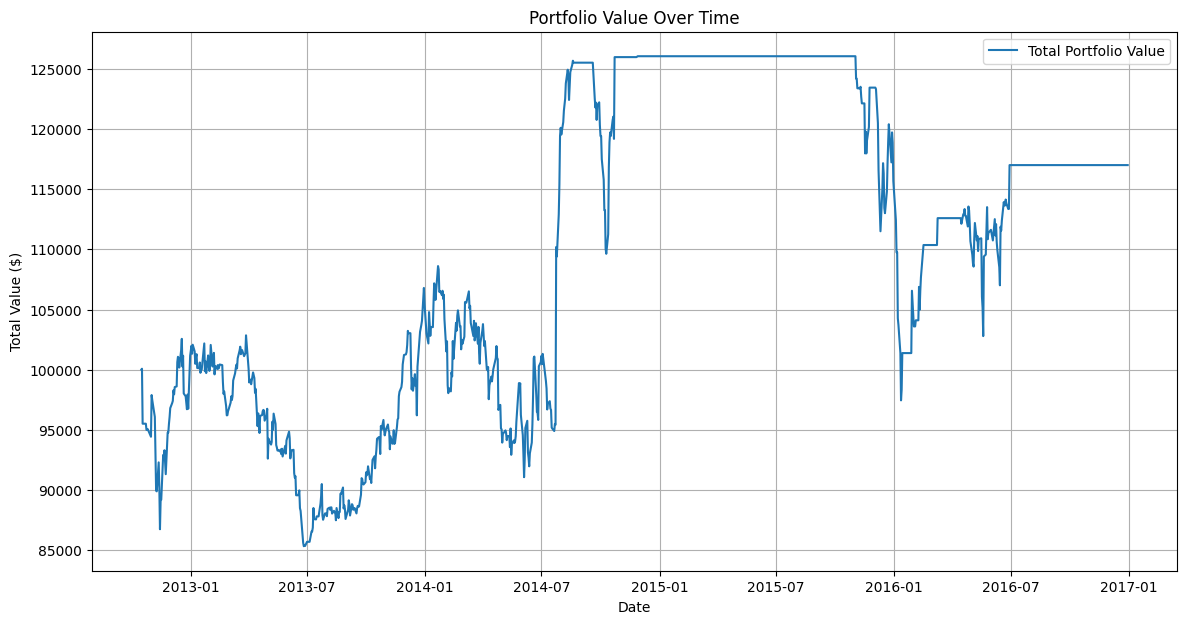

In [366]:
# Define function to calculate annualized returns and metrics
def calculate_annualized_returns(daily_values):
    """Calculate CAGR, annualized volatility, and Sortino ratio from daily portfolio values."""
    # CAGR
    years = (daily_values.index[-1] - daily_values.index[0]).days / 365.25
    cagr = ((daily_values[-1] / daily_values[0]) ** (1 / years)) - 1

    # Daily returns
    daily_returns = daily_values.pct_change().dropna()

    # Annualized Volatility
    annualized_volatility = daily_returns.std() * np.sqrt(252)  # 252 trading days

    # Sortino Ratio
    negative_returns = daily_returns[daily_returns < 0]
    downside_std = negative_returns.std() * np.sqrt(252)
    risk_free_rate = 0.01  # Risk-free rate of return
    sortino_ratio = (cagr - risk_free_rate) / downside_std if downside_std != 0 else np.nan

    return cagr, annualized_volatility, sortino_ratio

# Initialize investment and shares dictionary
initial_investment = 100000
num_stocks = len(df_close.columns)
initial_per_stock = initial_investment / num_stocks
shares = {stock: initial_per_stock / df_close[stock][0] for stock in df_close.columns}
money_left = initial_investment - sum(shares[stock] * df_close.loc[df_close.index[0], stock] for stock in shares)

# Create DataFrame for tracking portfolio value
portfolio_tracking = pd.DataFrame(index=df_close.index, columns=['Money_Left', 'Total_Value'])
portfolio_tracking.loc[df_close.index[0], 'Money_Left'] = money_left
portfolio_tracking.loc[df_close.index[0], 'Total_Value'] = initial_investment

# Simulate trading based on predictions
for i in df_close.index:
    if i > df_close.index[0]:
        # Update total portfolio value
        current_value = sum(shares[stock] * df_close.loc[i, stock] for stock in shares) + money_left
        portfolio_tracking.loc[i, 'Total_Value'] = current_value
        portfolio_tracking.loc[i, 'Money_Left'] = money_left

        # Trading decisions for the next day
        if i < df_close.index[-1]:
            next_day = df_close.index[df_close.index.get_loc(i) + 1]
            for stock in shares:
                target_col = stock.replace('Close', 'Target')
                if df_target.loc[next_day, target_col] == 1 and money_left >= df_close.loc[next_day, stock]:
                    shares_bought = money_left // df_close.loc[next_day, stock]
                    shares[stock] += shares_bought
                    money_left -= shares_bought * df_close.loc[next_day, stock]
                elif df_target.loc[next_day, target_col] == -1 and shares[stock] > 0:
                    money_left += shares[stock] * df_close.loc[next_day, stock]
                    shares[stock] = 0

# Calculate performance metrics
cagr, volatility, sortino_ratio = calculate_annualized_returns(portfolio_tracking['Total_Value'])

# Display the results
print(f"CAGR: {cagr:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_tracking['Total_Value'], label='Total Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value ($)')
plt.legend()
plt.grid(True)
plt.show()